In [1]:
import pandas as pd
import umap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
import hdbscan

%matplotlib inline

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [3]:
from sklearn.cluster import KMeans

In [4]:
final_df = pd.read_csv("../data/processed/final_df.csv")

In [5]:
final_df.set_index('id_student', inplace=True)

In [6]:
def drop_col (df, list):
    df.drop(columns=(list), inplace=True)
    return df

In [7]:
col_drop = ["region", "gender", "press_mod", "code_presentation", "studied_credits", "highest_education", 'age_band']

In [8]:
#replace nan with mean value
final_df["mean_score"].fillna(72.83, inplace = True)

In [9]:
#replace "0s" with mean
final_df['n_assignments'] = np.where((final_df.n_assignments == 0), 7, final_df.n_assignments)

In [10]:
final_df['mean_score'] = np.where((final_df.mean_score == 0.0), 72.83, final_df.mean_score)

In [11]:
drop_col(final_df, col_drop)

,n_assignments,mean_score,final_result,total_clicks,code_module
id_student,,,,,
11391,5,82.000000,Pass,934,AAA
28400,5,66.400000,Pass,1435,AAA
31604,5,76.000000,Pass,2158,AAA
32885,5,54.400000,Pass,1034,AAA
38053,5,68.000000,Pass,2445,AAA
...,...,...,...,...,...
2620947,9,88.888889,Distinction,476,GGG
2645731,9,88.111111,Distinction,893,GGG
2648187,9,76.666667,Pass,312,GGG


In [12]:
final_df['clicks_per_asmt'] = final_df['total_clicks']/final_df['n_assignments']



In [13]:
final_df

,n_assignments,mean_score,final_result,total_clicks,code_module,clicks_per_asmt
id_student,,,,,,
11391,5,82.000000,Pass,934,AAA,186.800000
28400,5,66.400000,Pass,1435,AAA,287.000000
31604,5,76.000000,Pass,2158,AAA,431.600000
32885,5,54.400000,Pass,1034,AAA,206.800000
38053,5,68.000000,Pass,2445,AAA,489.000000
...,...,...,...,...,...,...
2620947,9,88.888889,Distinction,476,GGG,52.888889
2645731,9,88.111111,Distinction,893,GGG,99.222222
2648187,9,76.666667,Pass,312,GGG,34.666667


In [14]:
idx=final_df.index.tolist()

In [15]:
final_df.index.min()

6516

In [16]:
final_df

,n_assignments,mean_score,final_result,total_clicks,code_module,clicks_per_asmt
id_student,,,,,,
11391,5,82.000000,Pass,934,AAA,186.800000
28400,5,66.400000,Pass,1435,AAA,287.000000
31604,5,76.000000,Pass,2158,AAA,431.600000
32885,5,54.400000,Pass,1034,AAA,206.800000
38053,5,68.000000,Pass,2445,AAA,489.000000
...,...,...,...,...,...,...
2620947,9,88.888889,Distinction,476,GGG,52.888889
2645731,9,88.111111,Distinction,893,GGG,99.222222
2648187,9,76.666667,Pass,312,GGG,34.666667


In [17]:
final_df.dtypes

n_assignments        int64
mean_score         float64
final_result        object
total_clicks         int64
code_module         object
clicks_per_asmt    float64
dtype: object

In [18]:
final_df.isnull().sum()

n_assignments      0
mean_score         0
final_result       0
total_clicks       0
code_module        0
clicks_per_asmt    0
dtype: int64

In [19]:
final_df[final_df.isnull().any(axis=1)]

,n_assignments,mean_score,final_result,total_clicks,code_module,clicks_per_asmt
id_student,,,,,,


In [20]:
drop_clicks = ["total_clicks"]

In [21]:
drop_col (final_df, drop_clicks)

,n_assignments,mean_score,final_result,code_module,clicks_per_asmt
id_student,,,,,
11391,5,82.000000,Pass,AAA,186.800000
28400,5,66.400000,Pass,AAA,287.000000
31604,5,76.000000,Pass,AAA,431.600000
32885,5,54.400000,Pass,AAA,206.800000
38053,5,68.000000,Pass,AAA,489.000000
...,...,...,...,...,...
2620947,9,88.888889,Distinction,GGG,52.888889
2645731,9,88.111111,Distinction,GGG,99.222222
2648187,9,76.666667,Pass,GGG,34.666667


In [22]:
final_df.round({'mean_score': 1, 'clicks_per_asmt': 1})

,n_assignments,mean_score,final_result,code_module,clicks_per_asmt
id_student,,,,,
11391,5,82.0,Pass,AAA,186.8
28400,5,66.4,Pass,AAA,287.0
31604,5,76.0,Pass,AAA,431.6
32885,5,54.4,Pass,AAA,206.8
38053,5,68.0,Pass,AAA,489.0
...,...,...,...,...,...
2620947,9,88.9,Distinction,GGG,52.9
2645731,9,88.1,Distinction,GGG,99.2
2648187,9,76.7,Pass,GGG,34.7


## scaling all feats. 

In [23]:
final_df.columns

Index(['n_assignments', 'mean_score', 'final_result', 'code_module',
       'clicks_per_asmt'],
      dtype='object')

In [24]:

NUM_FEATS = ['n_assignments', 'mean_score', 'clicks_per_asmt']
CAT_FEATS = ['final_result', 'code_module' ]
FEATS = NUM_FEATS + CAT_FEATS

In [25]:
numeric_transformer = \
Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), 
                ('scaler', StandardScaler())])

In [26]:
categorical_transformer = \
Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [27]:
preprocessor = \
ColumnTransformer(transformers=[('num', numeric_transformer, NUM_FEATS),
                                ('cat', categorical_transformer, CAT_FEATS)])

In [28]:
preprocessor

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='mean',
                                                                verbose=0)),
                                                 ('scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                             

In [29]:
final_df_scaled = pd.DataFrame(data=preprocessor.fit_transform(final_df))

In [30]:
final_df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.606588,0.591262,-0.230297,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.606588,-0.425134,0.188045,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.606588,0.200341,0.791759,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.606588,-1.206977,-0.146795,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.606588,-0.320888,1.031408,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26716,0.274987,1.040098,-0.789384,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26717,0.274987,0.989423,-0.595940,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26718,0.274987,0.243776,-0.865463,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26719,-1.267770,1.210221,-0.436127,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# UMAP

In [31]:
final_df_scaled = final_df_scaled.to_numpy()

In [32]:
reducer = umap.UMAP(random_state=42)
reducer.fit(final_df_scaled.data)

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [33]:
embedding = reducer.transform(final_df_scaled.data)

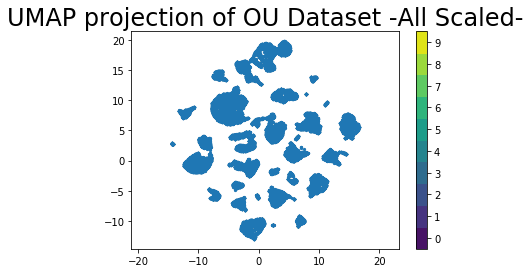

In [34]:
plt.scatter(embedding[:, 0], embedding[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of OU Dataset -All Scaled-', fontsize=24);